In [ ]:
pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [ ]:
sal=pd.read_csv('Salary.csv')
sal.head(10)

,ID,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [ ]:
sal.columns

Index(['ID', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
sal.drop(sal[['salary','salary_currency']],axis=1, inplace=True)

In [ ]:
sal.isnull().any()

ID                    False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [ ]:
value=sal[['salary_in_usd','experience_level','job_title']]
value.head()

,salary_in_usd,experience_level,job_title
0,79833,MI,Data Scientist
1,260000,SE,Machine Learning Scientist
2,109024,SE,Big Data Engineer
3,20000,MI,Product Data Analyst
4,150000,SE,Machine Learning Engineer


In [ ]:
sal_exp=value.groupby(['experience_level','job_title']).mean()
print(sal_exp.shape)
sal_exp.head()

(105, 1)


salary_in_usd
experience_level job_title                                        
EN               AI Scientist                         21987.250000
                 Applied Data Scientist              110037.000000
                 Applied Machine Learning Scientist   31875.000000
                 BI Data Analyst                      32136.000000
                 Big Data Engineer                    30703.333333

In [ ]:
sal_exp=sal_exp.reset_index()
sal_exp.head()

,experience_level,job_title,salary_in_usd
0,EN,AI Scientist,21987.250000
1,EN,Applied Data Scientist,110037.000000
2,EN,Applied Machine Learning Scientist,31875.000000
3,EN,BI Data Analyst,32136.000000
4,EN,Big Data Engineer,30703.333333


In [ ]:
sal_exp.pivot( 'experience_level', 'job_title', 'salary_in_usd').head()

job_title,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
experience_level,,,,,,,,,,,,,,,,,,,,,
EN,NaN,21987.25,NaN,110037.0,31875.0,32136.000000,NaN,30703.333333,79551.000000,NaN,...,NaN,225000.000000,NaN,NaN,NaN,NaN,NaN,NaN,86132.000000,NaN
EX,NaN,NaN,155000.0,NaN,NaN,150000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,600000.0,416000.0,NaN,NaN,NaN
MI,5409.0,160000.00,NaN,105619.0,178800.0,78086.333333,NaN,33537.000000,74784.666667,89294.0,...,NaN,109325.000000,NaN,37236.0,75000.0,NaN,151000.0,13036.0,136498.142857,NaN
SE,NaN,55000.00,195000.0,278500.0,NaN,NaN,99703.0,111535.500000,NaN,160000.0,...,117104.0,201666.666667,88654.0,NaN,170000.0,192500.0,187939.4,NaN,88859.400000,105000.0


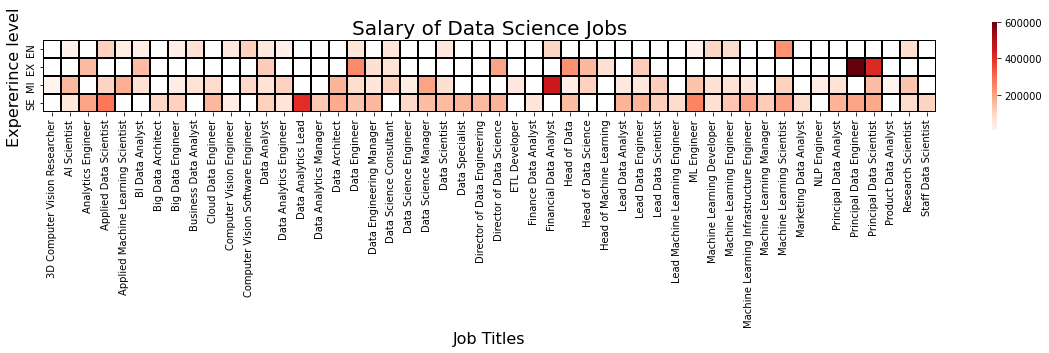

In [ ]:
plt.figure(figsize=(20,2)) 
pivot_table = sal_exp.pivot( 'experience_level', 'job_title', 'salary_in_usd') 
sns.heatmap(pivot_table,linewidth = 1,linecolor = "black",square = True,cmap = 'Reds',cbar= True)
plt.title('Salary of Data Science Jobs', size = 20) 
plt.xlabel('Job Titles', fontsize=16)
plt.ylabel('Expererince level', fontsize=16)
plt.show()

In [ ]:
valuew=sal[['salary_in_usd','work_year','job_title']]
valuew.head()

,salary_in_usd,work_year,job_title
0,79833,2020,Data Scientist
1,260000,2020,Machine Learning Scientist
2,109024,2020,Big Data Engineer
3,20000,2020,Product Data Analyst
4,150000,2020,Machine Learning Engineer


In [ ]:
sal_expw=valuew.groupby(['work_year','job_title']).mean()
print(sal_expw.shape)
sal_expw.head(80)

(98, 1)


salary_in_usd
work_year job_title                              
2020      AI Scientist               45896.000000
          BI Data Analyst            98000.000000
          Big Data Engineer          97690.333333
          Business Data Analyst     117500.000000
          Computer Vision Engineer   60000.000000
...                                           ...
2022      Data Analytics Manager    127485.000000
          Data Architect            182076.625000
          Data Engineer             126375.696629
          Data Science Engineer      60000.000000
          Data Science Manager      170196.600000

[80 rows x 1 columns]

In [ ]:
sal_expw=sal_expw.reset_index()
sal_expw.head()

,work_year,job_title,salary_in_usd
0,2020,AI Scientist,45896.000000
1,2020,BI Data Analyst,98000.000000
2,2020,Big Data Engineer,97690.333333
3,2020,Business Data Analyst,117500.000000
4,2020,Computer Vision Engineer,60000.000000


In [ ]:
sal_expw.pivot( 'work_year', 'job_title', 'salary_in_usd').head(80)

job_title,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
work_year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,45896.00,NaN,NaN,NaN,98000.0,NaN,97690.333333,117500.0,NaN,...,117104.0,260000.000000,NaN,NaN,NaN,NaN,148261.0,13036.0,246000.0,NaN
2021,5409.0,24263.25,NaN,82137.5,230700.0,70106.2,99703.0,24544.200000,59102.0,124647.0,...,NaN,145500.000000,88654.0,NaN,170000.0,328333.333333,239152.4,NaN,83003.6,105000.0
2022,NaN,160000.00,175000.0,238000.0,53437.5,NaN,NaN,NaN,44677.0,NaN,...,NaN,141766.666667,NaN,37236.0,75000.0,NaN,162674.0,NaN,105569.0,NaN


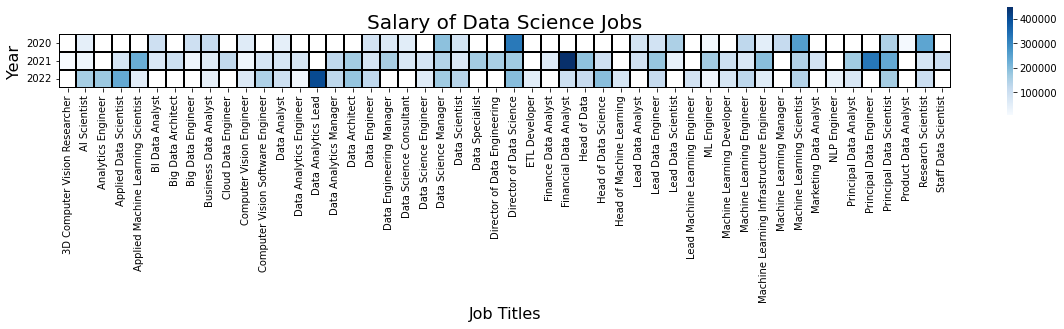

In [ ]:
plt.figure(figsize=(20,2)) 
pivot_table = sal_expw.pivot( 'work_year', 'job_title', 'salary_in_usd') 
sns.heatmap(pivot_table,linewidth = 1,linecolor = "black" ,square = True, cmap = 'Blues',cbar= True)
plt.title('Salary of Data Science Jobs', size = 20) 
plt.xlabel('Job Titles', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.show()

In [ ]:
ax= px.treemap(sal,path=['employee_residence'],title="Employees Resident")
ax.show()

In [ ]:
axb= px.treemap(sal,path=['job_title'],title="Job profile")
axb.show()